# Introduction to Language Processing
Patterns within written text are not the same across all authors or languages. This allows linguists to study the language of origin or potential authorship of texts where these characteristics are not directly known such as the Federalist Papers of the American Revolution.
In this case study, we will examine the properties of individual booksin a book collection from various authors and various languages.
More specifically, we will look at book lengths, number of unique words,and how these attributes cluster by language of or authorship.
Project Gutenberg is the oldest digital library of books.It aims to digitize and archive cultural works, and at present,contains over 50,000 books, all previously publishedand now available electronically.
We have downloaded a collection of over 100 titles from Project Gutenberg for analysis as a sample library for this case study.

In [1]:
text = "This is my test text. We will keep this text short to keep things mangable"

def count_word_slow(text):
    """This is a function to count to count the number of time each word accour in text(str). return a 
    dictionary where keys are unique word and value are word count. skip punctuation"""
    word_count = {}
    text = text.lower()
    skips = [".",";",":",",","'",'"']
    for ch in skips:
        text = text.replace(ch, "")
    for word in text.split(" "):
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    
    return word_count
    
count_word_slow(text)    

{'this': 2,
 'is': 1,
 'my': 1,
 'test': 1,
 'text': 2,
 'we': 1,
 'will': 1,
 'keep': 2,
 'short': 1,
 'to': 1,
 'things': 1,
 'mangable': 1}

Use collections Library 

In [2]:
from collections import Counter

def count_word(text):
    """This is a function to count to count the number of time each word accour in text(str). return a 
    dictionary where keys are unique word and value are word count. skip punctuation"""
    word_count = {}
    text = text.lower()
    skips = [".",";",":",",","'",'"']
    for ch in skips:
        text = text.replace(ch, "")
    
    word_count = Counter(text.split(" "))
    
    return word_count
    
count_word(text)    

Counter({'this': 2,
         'is': 1,
         'my': 1,
         'test': 1,
         'text': 2,
         'we': 1,
         'will': 1,
         'keep': 2,
         'short': 1,
         'to': 1,
         'things': 1,
         'mangable': 1})

In [3]:
def read_book(title_path):
    """read a book and return its string"""
    with open(title_path, "r", encoding = "utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n" , "").replace("\t", "")
    return text

text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")
len(text)
indx = text.find("What's in a name?")
sub_text = text[indx : indx + 1200]
print(sub_text)

What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, conside

In [4]:
def word_stats(count_word):
    """return number of unique and word frequency from  dictionary"""
    num_uniques = len(count_word)
    counts = count_word.values()
    return num_uniques, counts

num_uniques, counts = word_stats(count_word(text))
print ("The number of unique words and the word ",num_uniques)
print ("The sum of words in books ",sum(counts))

The number of unique words and the word  5118
The sum of words in books  40776


In [5]:
import os
import pandas as pd
book_dir = "./Books"
stats = pd.DataFrame(columns = ("language", "athour" ,"title" ,"length" ,"uniques" ))
title_num = 1
book_titles = []
for language in os.listdir(book_dir):  
    for athour in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + athour):
            book_titles.append([language, athour, title.replace(".txt", "")])
            input_file = book_dir + "/" + language + "/" + athour + "/" + title
            print(input_file)
            text = read_book(input_file)
            (num_uniques, counts) = word_stats(count_word(text))
            stats.loc[title_num] = language, athour.capitalize(), title.replace(".txt", "") ,sum(counts), num_uniques
            title_num += 1
            

./Books/English/shakespeare/A Midsummer Night's Dream.txt
./Books/English/shakespeare/Hamlet.txt
./Books/English/shakespeare/Macbeth.txt
./Books/English/shakespeare/Othello.txt
./Books/English/shakespeare/Richard III.txt
./Books/English/shakespeare/Romeo and Juliet.txt
./Books/English/shakespeare/The Merchant of Venice.txt
./Books/French/chevalier/L'åle de sable.txt
./Books/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./Books/French/chevalier/La capitaine.txt
./Books/French/chevalier/La fille des indiens rouges.txt
./Books/French/chevalier/La fille du pirate.txt
./Books/French/chevalier/Le chasseur noir.txt
./Books/French/chevalier/Les derniers Iroquois.txt
./Books/French/de Maupassant/Boule de Suif.txt
./Books/French/de Maupassant/Claire de Lune.txt
./Books/French/de Maupassant/Contes de la Becasse.txt
./Books/French/de Maupassant/L'inutile beautÇ.txt
./Books/French/de Maupassant/La Main Gauche.txt
./Books/French/de Maupassant/La Maison Tellier.txt
./Books/French/de M

In [6]:
stats.head()

,language,athour,title,length,uniques
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


In [7]:
stats.tail()

,language,athour,title,length,uniques
98,Portuguese,Queir¢s,O crime do padre Amaro,128630,29300
99,Portuguese,Queir¢s,O Mandarim,21440,7836
100,Portuguese,Queir¢s,O Primo Bazilio,107303,27644
101,Portuguese,Queir¢s,Os Maias,195771,40665
102,Portuguese,Shakespeare,Hamlet,30567,9700


In [8]:
stats.athour # one column

1        Shakespeare
2        Shakespeare
3        Shakespeare
4        Shakespeare
5        Shakespeare
6        Shakespeare
7        Shakespeare
8          Chevalier
9          Chevalier
10         Chevalier
11         Chevalier
12         Chevalier
13         Chevalier
14         Chevalier
15     De maupassant
16     De maupassant
17     De maupassant
18     De maupassant
19     De maupassant
20     De maupassant
21     De maupassant
22     De maupassant
23     De maupassant
24           Diderot
25           Diderot
26           Diderot
27           Diderot
28           Diderot
29              Sand
30              Sand
           ...      
73       Shakespeare
74            Branco
75            Branco
76            Branco
77            Branco
78            Branco
79            Branco
80            Branco
81            Branco
82            Branco
83            Branco
84            Branco
85            Branco
86            Branco
87            Branco
88            Branco
89           

In [9]:
stats[stats.language == "English"] # subsit of the data

,language,athour,title,length,uniques
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978


In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.uniques,"o", label = "English", color = "orange")

subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.uniques,"o", label = "French", color = "blueviolet")

plt.legend()
plt.xlabel("Number of Books")
plt.ylabel("Number of unique words")
plt.show()



<Figure size 1000x1000 with 1 Axes>

In [11]:
import pandas as pd
hamlets = pd.DataFrame(columns=("language","text"))
book_dir = "Books"
title_num = 0
for book in book_titles:
    language = book[0]
    author = book[1]
    title = book[2]
    if title == 'Hamlet':
        inputfile = "./Books/"+language+"/"+author+"/"+title+".txt"
        text = read_book(inputfile)
        hamlets.loc[title_num] = language, text
        title_num += 1

In [12]:
language, text = hamlets.iloc[0]

# Enter your code here.

counted_text = count_word(text)
data = pd.DataFrame(columns = ("word", "count"))
word_num = 1
for word in counted_text:
    data.loc[word_num] = word, counted_text[word]
    word_num += 1
print(data)

                word count
1                the   855
2           tragedie     2
3                 of   550
4        hamletactus     1
5             primus     1
6             scoena     1
7         primaenter     1
8           barnardo     8
9                and   601
10         francisco     2
11               two    19
12         centinels     1
13                    1850
14              whos     2
15             there    60
16              fran     8
17               nay    25
18            answer     7
19                me   204
20             stand    12
21        vnfoldyour     1
22             selfe    48
23               bar     7
24              long    16
25              liue    12
26              king   154
27                he   170
28               you   457
29              come    80
30              most    68
...              ...   ...
6747        fortunei     1
6748   kingdomewhich     1
6749          claime     1
6750      dothinuite     1
6751       speakeand     1
6

In [13]:
language, text = hamlets.iloc[0]
def summarize_text(language, text):
    counted_text = count_word(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })

    data["length"] = data["word"].apply(len)

    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    mean = data["count"].sum() 


    group_frequent = data.groupby(["frequency"])

    sub_data = pd.DataFrame({
        "language" : language,
        "frequency":["frequent","infrequent","unique"],
        "mean_word_length": group_frequent['length'].mean(),
        "num_words": group_frequent.size()
    })
    return(sub_data)


# sub_data.head()
# for name,group in group_frequent:
#     print (name)
#     print (group)
    


In [14]:
grouped_data = pd.DataFrame(columns = ["language", "frequency", "mean_word_length", "num_words"])
for index, row in hamlets.iterrows() :
    language = row['language']
    text = row['text']
    sub_data = summarize_text(language, text)
    grouped_data = grouped_data.append(sub_data)
    
# for i in range(hamlets.shape[0]):
#     language, text = hamlets.iloc[i]
#     sub_data = summarize_text(language, text)
#     grouped_data = grouped_data.append(sub_data)
grouped_data.head()

,language,frequency,mean_word_length,num_words
frequent,English,frequent,4.200000,280
infrequent,English,infrequent,5.943769,1316
unique,English,unique,8.088803,5180
frequent,German,frequent,4.544025,318
infrequent,German,infrequent,6.646633,1797


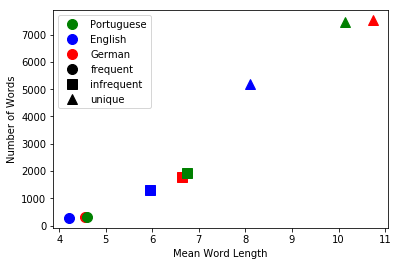

In [16]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )
    
color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")
# show your plot using `plt.show`!
plt.show()
